In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
data_2015= pd.read_csv("../input/world-happiness/2015.csv")
data_2016= pd.read_csv("../input/world-happiness/2016.csv")
data_2017= pd.read_csv("../input/world-happiness/2017.csv")
data_2018= pd.read_csv("../input/world-happiness/2018.csv")
data_2019= pd.read_csv("../input/world-happiness/2019.csv")

In [3]:
data_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
data_2015.shape

(158, 12)

In [7]:
print("2015")
for i in range(len(data_2015['Region'].unique())-1):
    print(str(data_2015['Region'].unique()[i])+" : "+ str(len(data_2015[data_2015['Region']==data_2015['Region'].unique()[i]])))

2015
Western Europe : 21
North America : 2
Australia and New Zealand : 2
Middle East and Northern Africa : 20
Latin America and Caribbean : 22
Southeastern Asia : 9
Central and Eastern Europe : 29
Eastern Asia : 6
Sub-Saharan Africa : 40


<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

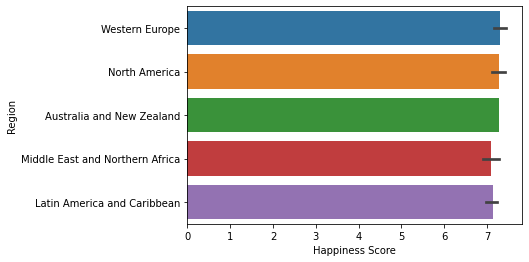

In [8]:
sns.barplot(y= data_2015['Region'][:20], x= data_2015['Happiness Score'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Country'>

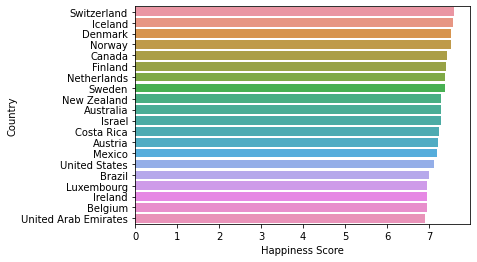

In [9]:
sns.barplot(y= data_2015['Country'][:20], x= data_2015['Happiness Score'])

In [10]:
data_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### Rename to Economy for every csv

In [11]:
data_2015.rename(columns={"Economy (GDP per Capita)" : "Economy"}, inplace=True)
data_2016.rename(columns={"Economy (GDP per Capita)" : "Economy"}, inplace=True)
data_2017.rename(columns={"Economy..GDP.per.Capita." : "Economy"}, inplace=True)
data_2018.rename(columns={"GDP per capita" : "Economy"}, inplace=True)
data_2019.rename(columns={"GDP per capita" : "Economy"}, inplace=True)

### Rename Happiness Score to Score

In [12]:
data_2015.rename(columns={"Happiness Score" : "Score"}, inplace=True)
data_2016.rename(columns={"Happiness Score" : "Score"}, inplace=True)
data_2017.rename(columns={"Happiness.Score" : "Score"}, inplace=True)

### Rename Happiness Rank to Rank

In [13]:
data_2015.rename(columns={"Happiness Rank" : "Rank"}, inplace=True)
data_2016.rename(columns={"Happiness Rank" : "Rank"}, inplace=True)
data_2017.rename(columns={"Happiness.Rank" : "Rank"}, inplace=True)
data_2018.rename(columns={"Overall rank" : "Rank"}, inplace=True)
data_2019.rename(columns={"Overall rank" : "Rank"}, inplace=True)

### Remove Region and Change name to Country

In [14]:
data_2015.drop(columns=["Region"], inplace=True)
data_2016.drop(columns=["Region"], inplace=True)
data_2018.rename(columns={"Country or region" : "Country"}, inplace=True)
data_2019.rename(columns={"Country or region" : "Country"}, inplace=True)

### Change name for health

In [15]:
data_2015.rename(columns={"Health (Life Expectancy)" : "Health"}, inplace=True)
data_2016.rename(columns={"Health (Life Expectancy)" : "Health"}, inplace=True)
data_2017.rename(columns={"Health..Life.Expectancy." : "Health"}, inplace=True)
data_2018.rename(columns={"Healthy life expectancy" : "Health"}, inplace=True)
data_2019.rename(columns={"Healthy life expectancy" : "Health"}, inplace=True)

### Change name for Freedom

In [16]:
data_2018.rename(columns={"Freedom to make life choices" : "Freedom"}, inplace=True)
data_2019.rename(columns={"Freedom to make life choices" : "Freedom"}, inplace=True)

### Change name for Trust (Government Corruption

In [17]:
data_2015.rename(columns={"Trust (Government Corruption)" : "Trust"}, inplace=True)
data_2016.rename(columns={"Trust (Government Corruption)" : "Trust"}, inplace=True)
data_2017.rename(columns={"Trust..Government.Corruption." : "Trust"}, inplace=True)
data_2018.rename(columns={"Perceptions of corruption" : "Trust"}, inplace=True)
data_2019.rename(columns={"Perceptions of corruption" : "Trust"}, inplace=True)

## Economy vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Economy vs Happiness Score from 2015- 2019')

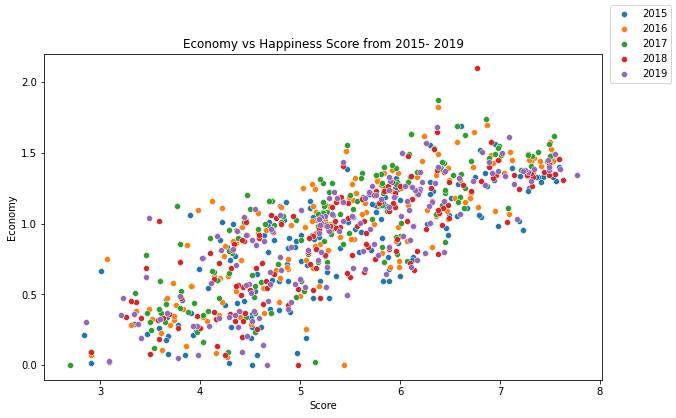

In [18]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= data_2015['Score'],y=data_2015['Economy'])
sns.scatterplot(x= data_2016['Score'],y=data_2016['Economy'])
sns.scatterplot(x= data_2017['Score'],y=data_2017['Economy'])
sns.scatterplot(x= data_2018['Score'],y=data_2018['Economy'])
sns.scatterplot(x= data_2019['Score'],y=data_2019['Economy'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Economy vs Happiness Score from 2015- 2019")

## Health vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Health vs Happiness Score from 2015- 2019')

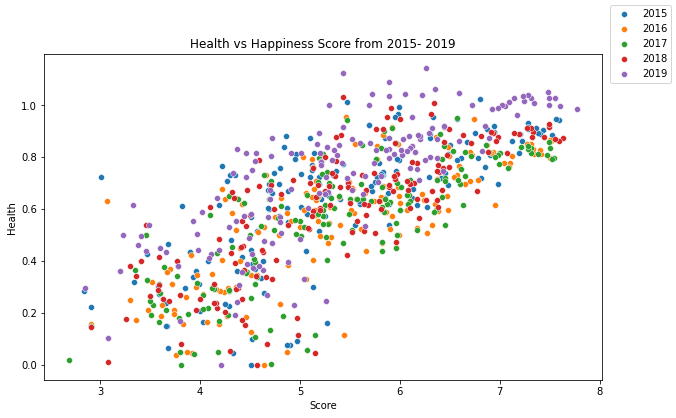

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= data_2015['Score'],y=data_2015['Health'])
sns.scatterplot(x= data_2016['Score'],y=data_2016['Health'])
sns.scatterplot(x= data_2017['Score'],y=data_2017['Health'])
sns.scatterplot(x= data_2018['Score'],y=data_2018['Health'])
sns.scatterplot(x= data_2019['Score'],y=data_2019['Health'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Health vs Happiness Score from 2015- 2019")

## Freedom vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Freedom vs Happiness Score from 2015- 2019')

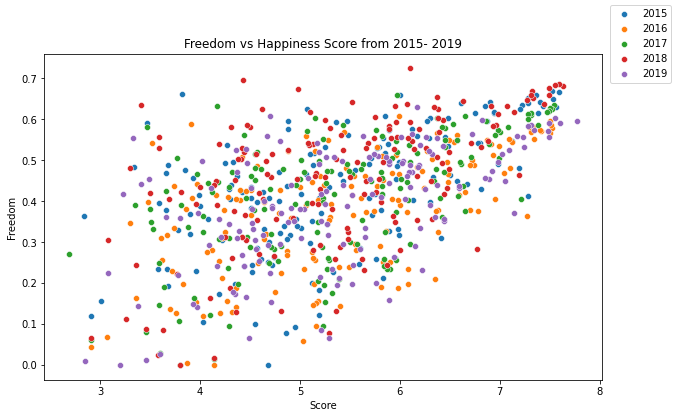

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= data_2015['Score'],y=data_2015['Freedom'])
sns.scatterplot(x= data_2016['Score'],y=data_2016['Freedom'])
sns.scatterplot(x= data_2017['Score'],y=data_2017['Freedom'])
sns.scatterplot(x= data_2018['Score'],y=data_2018['Freedom'])
sns.scatterplot(x= data_2019['Score'],y=data_2019['Freedom'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Freedom vs Happiness Score from 2015- 2019")

## Trust vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Trust vs Happiness Score from 2015- 2019')

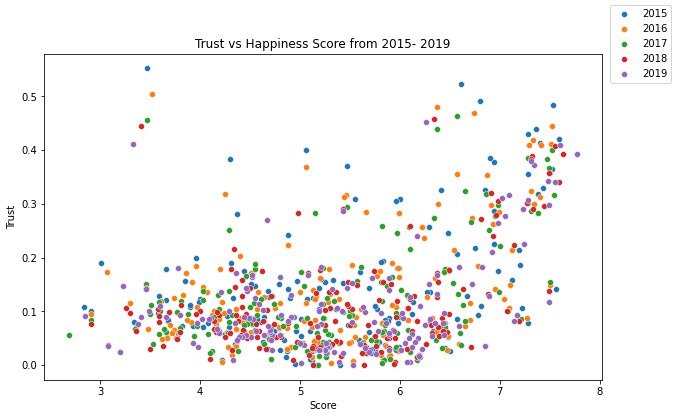

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= data_2015['Score'],y=data_2015['Trust'])
sns.scatterplot(x= data_2016['Score'],y=data_2016['Trust'])
sns.scatterplot(x= data_2017['Score'],y=data_2017['Trust'])
sns.scatterplot(x= data_2018['Score'],y=data_2018['Trust'])
sns.scatterplot(x= data_2019['Score'],y=data_2019['Trust'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Trust vs Happiness Score from 2015- 2019")

## Happiest Country vs. Saddest Country

In [22]:
print("In 2015, Happiest Country is "+ str(data_2015[:1]['Country'][0]) +" and Saddest Country is "+ str(data_2015[-1:]['Country'][len(data_2015)-1]))
print("In 2016, Happiest Country is "+ str(data_2016[:1]['Country'][0]) +" and Saddest Country is "+ str(data_2016[-1:]['Country'][len(data_2016)-1]))
print("In 2017, Happiest Country is "+ str(data_2017[:1]['Country'][0]) +" and Saddest Country is "+ str(data_2017[-1:]['Country'][len(data_2017)-1]))
print("In 2018, Happiest Country is "+ str(data_2018[:1]['Country'][0]) +" and Saddest Country is "+ str(data_2018[-1:]['Country'][len(data_2018)-1]))
print("In 2019, Happiest Country is "+ str(data_2019[:1]['Country'][0]) +" and Saddest Country is "+ str(data_2019[-1:]['Country'][len(data_2019)-1]))

In 2015, Happiest Country is Switzerland and Saddest Country is Togo
In 2016, Happiest Country is Denmark and Saddest Country is Burundi
In 2017, Happiest Country is Norway and Saddest Country is Central African Republic
In 2018, Happiest Country is Finland and Saddest Country is Burundi
In 2019, Happiest Country is Finland and Saddest Country is South Sudan


In [23]:
comparison_dataset={'Country':[data_2015[:1]['Country'][0], 
                    data_2015[-1:]['Country'][len(data_2015)-1],
                    data_2016[:1]['Country'][0], 
                    data_2016[-1:]['Country'][len(data_2016)-1],
                    data_2017[:1]['Country'][0], 
                    data_2017[-1:]['Country'][len(data_2017)-1],
                    data_2018[:1]['Country'][0], 
                    data_2018[-1:]['Country'][len(data_2018)-1],
                    data_2019[:1]['Country'][0], 
                    data_2019[-1:]['Country'][len(data_2019)-1]],
        'Economy':[data_2015[:1]['Economy'][0],
                   data_2015[-1:]['Economy'][len(data_2015)-1],
                   data_2016[:1]['Economy'][0],
                   data_2016[-1:]['Economy'][len(data_2016)-1],
                   data_2017[:1]['Economy'][0],
                   data_2017[-1:]['Economy'][len(data_2017)-1],
                   data_2018[:1]['Economy'][0],
                   data_2018[-1:]['Economy'][len(data_2018)-1],
                   data_2019[:1]['Economy'][0],
                   data_2019[-1:]['Economy'][len(data_2019)-1]],
         'Year':['2015','2015','2016','2016','2017','2017','2018','2018','2019','2019']
        }
comparison = pd.DataFrame(comparison_dataset)
comparison

,Country,Economy,Year
0,Switzerland,1.396510,2015
1,Togo,0.208680,2015
2,Denmark,1.441780,2016
3,Burundi,0.068310,2016
4,Norway,1.616463,2017
5,Central African Republic,0.000000,2017
6,Finland,1.305000,2018
7,Burundi,0.091000,2018
8,Finland,1.340000,2019
9,South Sudan,0.306000,2019


Text(0.5, 1.0, 'Happiest Country vs. Saddest Country')

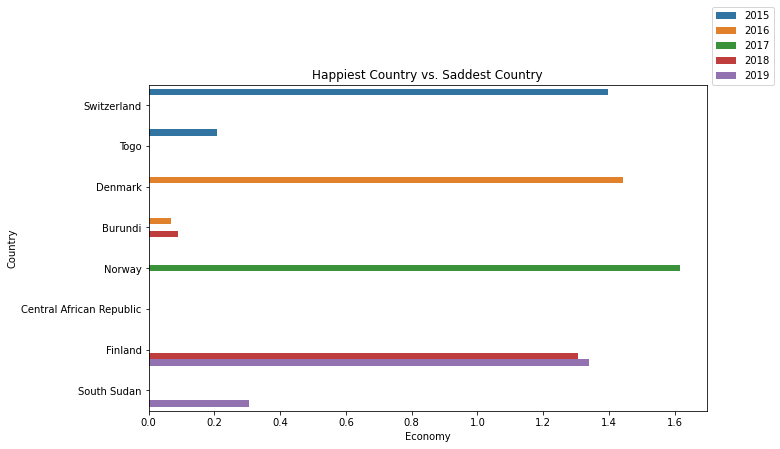

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(y=comparison['Country'], x=comparison['Economy'], hue=comparison['Year'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Happiest Country vs. Saddest Country")